In [16]:
import numpy as np
import matplotlib.pyplot as plt

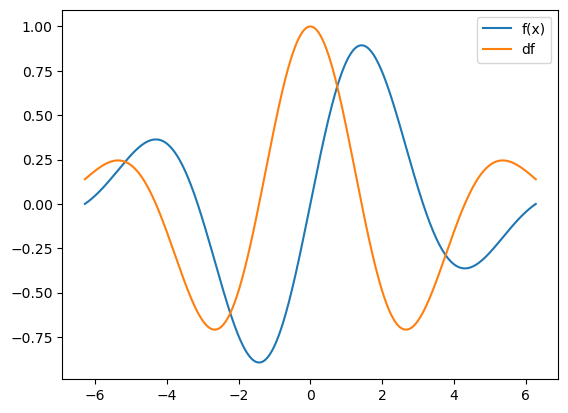

In [17]:
# the function
x = np.linspace(-2 * np.pi, 2 * np.pi, 401)
fx = np.sin(x) * np.exp(-(x**2) * 0.05)

# and its derivative
df = np.cos(x) * np.exp(-(x**2) * 0.05) + np.sin(x) * (-0.1 * x) * np.exp(
    -(x**2) * 0.05
)

# quick plot for inspection
plt.plot(x, fx, x, df)
plt.legend(["f(x)", "df"])
plt.show()

In [18]:
def fx(x):
    return np.sin(x) * np.exp(-(x**2) * 0.05)


def deriv(x):
    return np.cos(x) * np.exp(-(x**2) * 0.05) + np.sin(x) * (-0.1 * x) * np.exp(
        -(x**2) * 0.05
    )

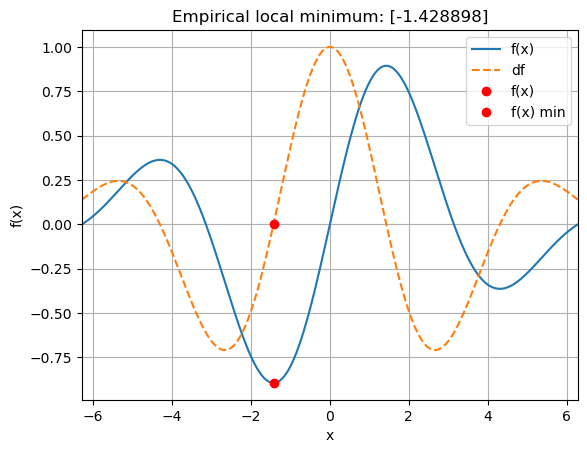

In [19]:
localmin = np.random.choice(x, 1)

learning_rate = 0.01
training_epochs = 1000

for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate * grad


plt.plot(x, fx(x), x, deriv(x), "--")
plt.plot(localmin, fx(localmin), "ro")
plt.plot(localmin, deriv(localmin), "ro")

plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(["f(x)", "df", "f(x)", "f(x) min"])

plt.title(f"Empirical local minimum: {localmin}")
plt.show()

## Run Parametric Experiments


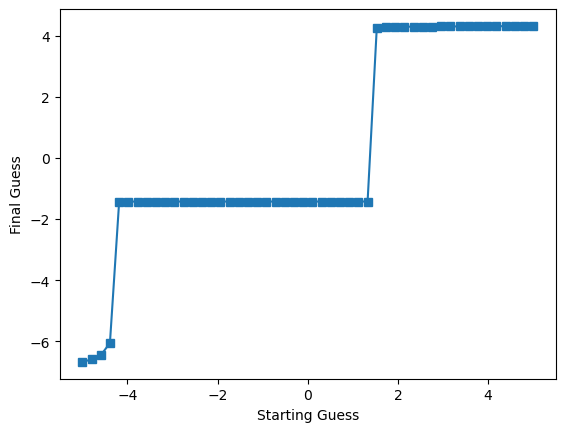

In [20]:
# Experiment # 1: systematically varying the starting location

startlocs = np.linspace(-5, 5, 50)
finalres = np.zeros(len(startlocs))

# loop over starting points
for idx, localmin in enumerate(startlocs):
    learning_rate = 0.01
    training_epochs = 1000

    # run the gradient descent training
    for i in range(training_epochs):
        grad = deriv(localmin)
        localmin = localmin - learning_rate * grad

    finalres[idx] = localmin

# plot the results
plt.plot(startlocs, finalres, "s-")
plt.xlabel("Starting Guess")
plt.ylabel("Final Guess")
plt.show()

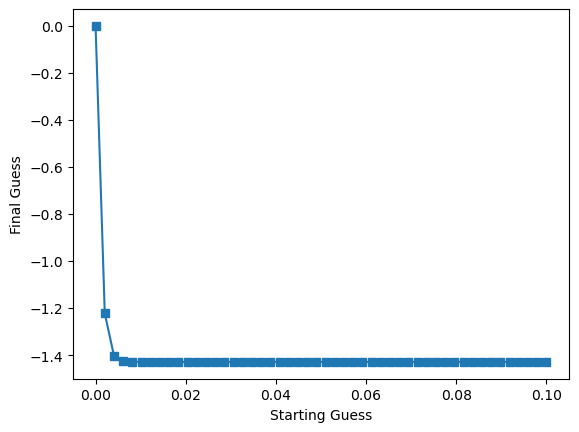

In [21]:
# Experiment # 1: systematically varying the learning rate

learning_rates = np.linspace(1e-10, 1e-1, 50)
finalres = np.zeros(len(learning_rates))

# loop over starting points
for idx, learning_rate in enumerate(learning_rates):
    localmin = 0  # force start guess to 0
    training_epochs = 1000

    # run the gradient descent training
    for i in range(training_epochs):
        grad = deriv(localmin)
        localmin = localmin - learning_rate * grad

    finalres[idx] = localmin

# plot the results
plt.plot(learning_rates, finalres, "s-")
plt.xlabel("Starting Guess")
plt.ylabel("Final Guess")
plt.show()

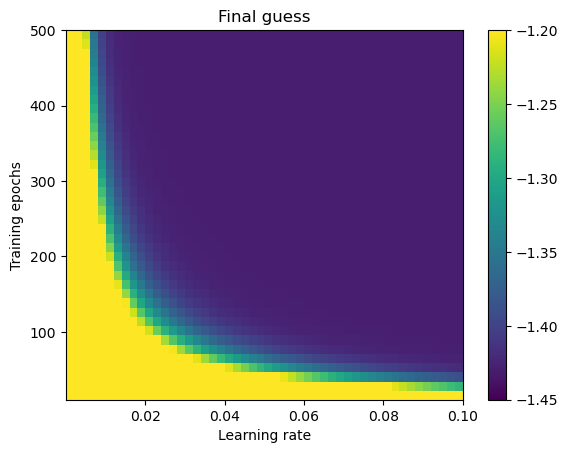

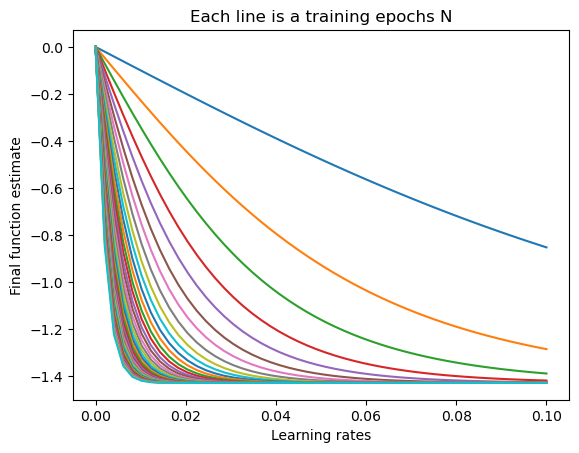

In [22]:
# Experiment 3: interaction between learning rate and training epochs

# setup parameters
learningrates = np.linspace(1e-10, 1e-1, 50)
training_epochs = np.round(np.linspace(10, 500, 40))

# initialize matrix to store results
finalres = np.zeros((len(learningrates), len(training_epochs)))

# loop over learning rates
for Lidx, learningRate in enumerate(learningrates):
    # loop over training epochs
    for Eidx, trainEpochs in enumerate(training_epochs):

        # run through training (again fixing starting location)
        localmin = 0
        for i in range(int(trainEpochs)):
            grad = deriv(localmin)
            localmin = localmin - learningRate * grad

        # store the final guess
        finalres[Lidx, Eidx] = localmin

# plot the results

plt.imshow(
    finalres.T,
    extent=[
        learningrates[0],
        learningrates[-1],
        training_epochs[0],
        training_epochs[-1],
    ],
    aspect="auto",
    origin="lower",
    vmin=-1.45,
    vmax=-1.2,
)

plt.xlabel("Learning rate")
plt.ylabel("Training epochs")
plt.title("Final guess")
plt.colorbar()
plt.show()

# another visualization
plt.plot(learningrates, finalres)
plt.xlabel("Learning rates")
plt.ylabel("Final function estimate")
plt.title("Each line is a training epochs N")
plt.show()

### Changing the learning rate Dynamically.


**Define function and derivative:** Grid `x` is created and the quadratic objective `f(x)=3x^2 - 3x + 4` is defined along with its analytic derivative `deriv(x)`; these are used by subsequent gradient-descent experiments.


In [23]:
x = np.linspace(-2, 2, 2001)


def fx(x):
    return 3 * x**2 - 3 * x + 4


def deriv(x):
    return 6 * x - 3

**Fixed learning rate run:** Run gradient descent with a fixed learning rate (`learning_rate=0.01`) for `training_epochs` iterations, recording the parameter value, gradient, and learning rate at each epoch into `model_params_basic`.


In [40]:
# no change in learning rate
localmin = np.random.choice(x, 1)
initval = localmin[:]  # store the initial value

learning_rate = 0.01
training_epochs = 100

# initialize matrix to store results
model_params_basic = np.zeros((training_epochs, 3))

# loop over training epochs
for i in range(training_epochs):
    # run through training (again fixing starting location)
    L = learning_rate
    grad = deriv(localmin)
    localmin = localmin - L * grad

    # store the final guess
    model_params_basic[i, 0] = localmin[0]
    model_params_basic[i, 1] = grad[0]
    model_params_basic[i, 2] = L

**Gradient-based adaptive learning rate:** Adapt the learning rate each iteration by scaling a base learning rate by the absolute gradient magnitude (i.e. `L = base_lr * |grad|`), update parameters accordingly, and save traces in `model_params_grad`.


In [ ]:
# gradient based updation of learning rate
localmin = np.random.choice(x, 1)
initval = localmin[:]  # store the initial value

# because we are multiplying it with grad, that is also a scalar
learning_rate = [0.01]
training_epochs = 100

# initialize matrix to store results
model_params_grad = np.zeros((training_epochs, 3))

# loop over training epochs
for i in range(training_epochs):
    # run through training (again fixing starting location)
    grad = deriv(localmin)
    L = learning_rate * np.abs(grad)
    localmin = localmin - L * grad

    # store the final guess
    model_params_grad[i, 0] = localmin[0]
    model_params_grad[i, 1] = grad[0]
    model_params_grad[i, 2] = L[0]

**Time-based (linear decay) learning rate:** Use a learning rate that decays linearly over iterations (`L = lr0 * (1 - t/T)`), update parameters each epoch, and record results in `model_params_time`.


In [46]:
# time-based learning rate
learning_rate = 0.1
localmin = initval

model_params_time = np.zeros((training_epochs, 3))

for i in range(training_epochs):
    grad = deriv(localmin)
    L = learning_rate * (1 - (i + 1) / training_epochs)
    localmin = localmin - L * grad

    model_params_grad[i, 0] = localmin[0]
    model_params_grad[i, 1] = grad[0]
    model_params_grad[i, 2] = L

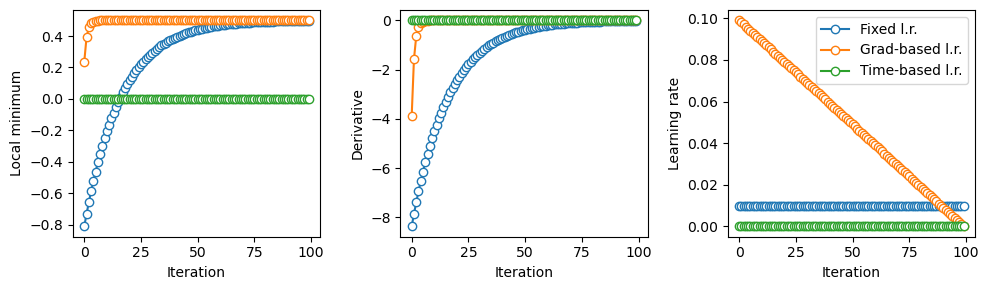

In [47]:
# plot the results

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# generate the plots
for i in range(3):
    ax[i].plot(model_params_basic[:, i], "o-", markerfacecolor="w")
    ax[i].plot(model_params_grad[:, i], "o-", markerfacecolor="w")
    ax[i].plot(model_params_time[:, i], "o-", markerfacecolor="w")
    ax[i].set_xlabel("Iteration")

ax[0].set_ylabel("Local minimum")
ax[1].set_ylabel("Derivative")
ax[2].set_ylabel("Learning rate")
ax[2].legend(["Fixed l.r.", "Grad-based l.r.", "Time-based l.r."])

plt.tight_layout()
plt.show()